In [4]:
def transpose(matrix):
    new_matrix = []
    for col in range(len(matrix[0])):
        new_row = []
        for row in matrix:
            new_row.append(row[col])
        new_matrix.append(new_row)
    return new_matrix

def matrix_multiply(matrix1, matrix2):
    return [[dot_product(row, col) for col in transpose(matrix2)] for row in matrix1]

def pca(X, num_components):
    n_samples = len(X)
    n_features = len(X[0])

# Step 1: Calculate the mean of each feature. 
    X_mean = [0.0] * n_features
    for j in range(n_features):
        for i in range(n_samples):
            X_mean[j] += X[i][j]
        X_mean[j] /= n_samples
    print("X_Mean: ",X_mean)

    # Step 2: Calculate the covariance matrix of the standardized data.
    X_centered = [[X[i][j] - X_mean[j] for j in range(n_features)] for i in range(n_samples)]
    cov_matrix = matrix_multiply(transpose(X_centered), X_centered)
    cov_matrix = [[cov_matrix[i][j] / (n_samples - 1) for j in range(n_features)] for i in range(n_features)]
    print("\nCovariance Matrix:")
    for row in cov_matrix:
        print(row)

    # Step 3: Calculate the eigenvectors and eigenvalues of the covariance matrix.
    eigenvalues, eigenvectors = eigen_decomposition(cov_matrix)
    print("\nEigen values: ", eigenvalues)
    print("Eigen vectors: ", eigenvectors)

    # Sort the eigenvectors by eigenvalues in descending order.
    sorted_indices = sorted(range(len(eigenvalues)), key=lambda k: eigenvalues[k], reverse=True)
    eigenvectors = [[eigenvectors[i][j] for j in sorted_indices[:num_components]] for i in range(n_features)]

    # Step 4: Project the data onto the lower-dimensional space.
    projected_data = matrix_multiply(X_centered, eigenvectors)

    return projected_data, eigenvectors

def dot_product(vec1, vec2):
    result = 0.0
    for i in range(len(vec1)):
        result += vec1[i] * vec2[i]
    return result


def eigenvalues_characteristic(matrix):
    a = matrix[0][0]
    b = matrix[0][1]
    c = matrix[1][0]
    d = matrix[1][1]

    discriminant = (a + d) * (a + d) - 4 * (a * d - b * c)

    eigenvalue1 = (a + d + discriminant ** 0.5) / 2
    eigenvalue2 = (a + d - discriminant ** 0.5) / 2

    return [eigenvalue1, eigenvalue2]

def eigenvectors_characteristic(matrix, eigenvalues):
    a = matrix[0][0]
    b = matrix[0][1]
    c = matrix[1][0]
    d = matrix[1][1]

    if eigenvalues[0] == eigenvalues[1]:
        # Return any nonzero vector as the eigenvector
        return [[1.0, 1.0]]

    eigenvector1 = [eigenvalues[0] - d, b]
    eigenvector2 = [eigenvalues[1] - d, b]

    # Calculate the dot product of eigenvectors 
    norm_factor1 = dot_product(eigenvector1, eigenvector1) ** 0.5
    norm_factor2 = dot_product(eigenvector2, eigenvector2) ** 0.5

    # Normalize eigenvectors
    eigenvector1 = [x / norm_factor1 for x in eigenvector1]
    eigenvector2 = [x / norm_factor2 for x in eigenvector2]

    return [eigenvector1, eigenvector2]

def eigen_decomposition(matrix):
    eigenvalues = eigenvalues_characteristic(matrix)
    eigenvectors = eigenvectors_characteristic(matrix, eigenvalues)
    return eigenvalues, eigenvectors

if __name__ == "__main__":
    n_samples = 4
    n_features = 2
    X = [[4, 11],
         [8, 4],
         [13, 5],
         [7, 14]]

    num_components = 1

    # Perform PCA
    projected_data, principal_components = pca(X, num_components)

    print("\nOriginal data shape:", (n_samples, n_features))
    print("Projected data shape:", (n_samples, num_components))
    print("Transformed data:", projected_data)


X_Mean:  [8.0, 8.5]

Covariance Matrix:
[14.0, -11.0]
[-11.0, 23.0]

Eigen values:  [30.384864324004713, 6.615135675995287]
Eigen vectors:  [[0.5573899686393252, -0.8302508192469623], [-0.8302508192469622, -0.5573899686393251]]

Original data shape: (4, 2)
Projected data shape: (4, 1)
Transformed data: [[-4.305186922674706], [3.73612868661133], [5.692827710560994], [-5.1237694744976165]]


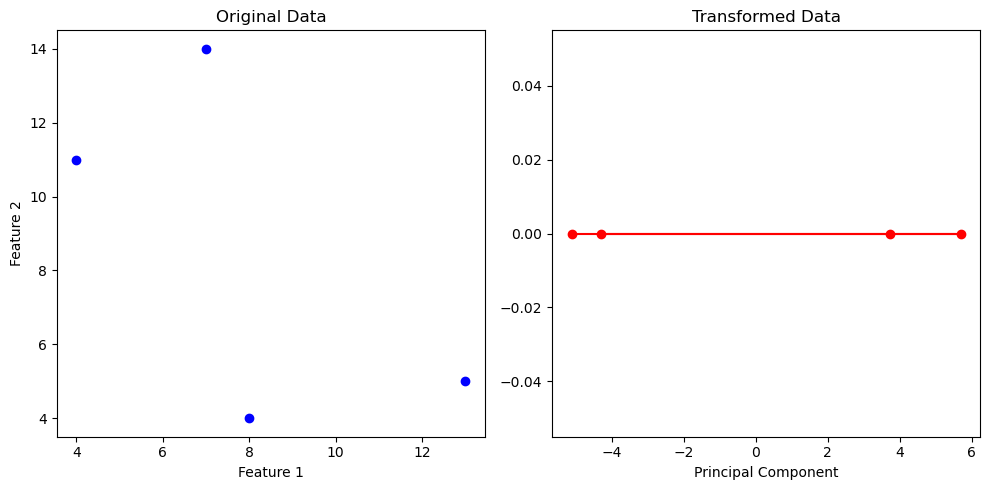

In [5]:
import matplotlib.pyplot as plt

original_data_x = [x[0] for x in X]
original_data_y = [x[1] for x in X]

transformed_data = [x[0] for x in projected_data]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(original_data_x, original_data_y, color='blue')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(transformed_data, [0] * len(transformed_data), color='red')
plt.plot(transformed_data, [0] * len(transformed_data), color='red')
plt.title('Transformed Data')
plt.xlabel('Principal Component')
plt.ylabel('')

plt.tight_layout()
plt.show()